In [76]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.7.0


In [2]:
dataset = pd.read_csv('qt_dataset.csv', sep=',', engine='python', encoding='windows-1252')
dataset.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
1,1,96.0,92.0,95.0,Negative
2,2,95.0,92.0,99.0,Negative
3,3,97.0,56.0,96.0,Negative
4,4,88.0,94.0,98.0,Positive


In [3]:
dataset.isnull().sum()
dataset = dataset.dropna()
dataset.shape

(10000, 5)

In [4]:
# graph_data = dataset.copy()
# graph_data['Result'] = graph_data['Result'].map(lambda x: 1 if x == 'Positive' else 0 )
# sns.pairplot(dataset[['Oxygen', 'PulseRate', 'Temperature', 'Result']], diag_kind='kde')

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.shape

(8000, 5)

In [5]:
train_features = train_dataset.copy().drop(columns =['ID','Result'])
test_features = test_dataset.copy().drop(columns =['ID','Result'])

train_features.head()

,Oxygen,PulseRate,Temperature
9394,92.0,119.0,95.0
898,88.0,85.0,95.0
2398,91.0,100.0,105.0
5906,99.0,53.0,96.0
2343,99.0,128.0,97.0


In [6]:
train_labels = train_dataset.copy().pop('Result').apply(lambda x: 1 if x == 'Positive' else 0 )
test_labels = test_dataset.copy().pop('Result').apply(lambda x: 1 if x == 'Positive' else 0 )
train_labels = tf.one_hot(train_labels, 2)
test_labels = tf.one_hot(test_labels, 2)
train_labels

2022-04-02 07:45:22.102052: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(8000, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)>

In [7]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(train_features))

In [8]:
# dnn_model = keras.Sequential([
#     normalizer,
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(2)
# ])

In [9]:
# dnn_model.compile(loss=keras.losses.BinaryCrossentropy(), 
#                   optimizer=tf.keras.optimizers.Adam(0.001), 
#                   metrics=['accuracy'])

# dnn_model.summary()

In [10]:
# history = dnn_model.fit(
#     train_features, train_labels,
#     validation_split=0.2,
#     verbose=1, epochs=100)

In [11]:
# def plot_loss(history):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('Model Accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

#     #Grafico de desempenho do loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model Loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [12]:
# plot_loss(history)

In [14]:
# pred = dnn_model.predict(test_features)

In [15]:
# pred

In [18]:
train_labels = train_dataset.copy().pop('Result').apply(lambda x: 1 if x == 'Positive' else 0 )
test_labels = test_dataset.copy().pop('Result').apply(lambda x: 1 if x == 'Positive' else 0 )
train_labels_one_hot = tf.one_hot(train_labels, 2)
test_labels_one_hot = tf.one_hot(test_labels, 2)

test_labels_one_hot

<tf.Tensor: shape=(2000, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

In [36]:
normalizer = tf.keras.layers.Normalization(axis=-1, input_shape=[3,])
normalizer.adapt(np.array(test_features))
first = np.array(train_features[:1])

print(train_features[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


      Oxygen  PulseRate  Temperature
9394    92.0      119.0         95.0
First example: [[ 92. 119.  95.]]

Normalized: [[-0.12  1.29 -1.56]]


In [77]:
model = tf.keras.models.Sequential([
    normalizer,

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001),),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 3)                7         
 ion)                                                            
                                                                 
 dense_32 (Dense)            (None, 64)                256       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                     

In [78]:
history = model.fit(np.array(train_features), train_labels_one_hot, epochs=10, validation_split=0.33)

Epoch 1/10
168/168 [==============================] - 2s 6ms/step - loss: 0.2669 - accuracy: 0.9088 - val_loss: 0.1785 - val_accuracy: 0.9417
Epoch 2/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1988 - accuracy: 0.9321 - val_loss: 0.1547 - val_accuracy: 0.9485
Epoch 3/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1756 - accuracy: 0.9420 - val_loss: 0.1418 - val_accuracy: 0.9572
Epoch 4/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1548 - accuracy: 0.9489 - val_loss: 0.1242 - val_accuracy: 0.9618
Epoch 5/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1470 - accuracy: 0.9547 - val_loss: 0.1036 - val_accuracy: 0.9693
Epoch 6/10
168/168 [==============================] - 1s 5ms/step - loss: 0.1313 - accuracy: 0.9614 - val_loss: 0.1024 - val_accuracy: 0.9705
Epoch 7/10
168/168 [==============================] - 1s 5ms/step - loss: 0.1212 - accuracy: 0.9601 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 

In [79]:
test_loss, test_acc = model.evaluate(test_features,  test_labels_one_hot, verbose=2)

print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 0.0686 - accuracy: 0.9810 - 307ms/epoch - 5ms/step

Test accuracy: 0.9810000061988831


In [81]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 3)                7         
 ion)                                                            
                                                                 
 dense_32 (Dense)            (None, 64)                256       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                     

In [82]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_features)
predictions[1]

array([0.271, 0.729], dtype=float32)

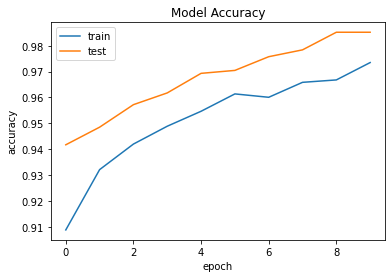

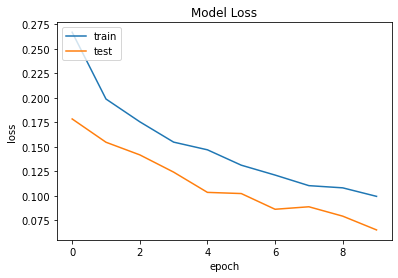

In [83]:
def plot_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #Grafico de desempenho do loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_loss(history)

In [46]:
# train_labels_one_hot

In [45]:
# model = tf.keras.models.Sequential([
#   normalizer,
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [44]:
# train_labels

In [47]:
# history = model.fit(train_features, train_labels, epochs=10, validation_split=0.33)

In [48]:
# plot_loss(history)

In [50]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict([0.0, 56.0, 96.0])
predictions

array([[0.269, 0.731]], dtype=float32)

In [51]:
# model.summary()

In [55]:
model.save('output/model')

INFO:tensorflow:Assets written to: output/model/assets


In [56]:
SAVED_MODEL_PATH = 'output/model'
TFLITE_FILE_PATH = 'output/model.tflite'

In [57]:
# Convert the model using TFLiteConverter
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH)
tflite_model = converter.convert()
with open(TFLITE_FILE_PATH, 'wb') as f:
  f.write(tflite_model)


2022-04-02 07:57:36.749386: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-04-02 07:57:36.749416: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-04-02 07:57:36.749424: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
2022-04-02 07:57:36.751627: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: output/model
2022-04-02 07:57:36.754547: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2022-04-02 07:57:36.754565: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: output/model
2022-04-02 07:57:36.762597: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2022-04-02 07:57:36.840783: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: output/model
2022-04-02 07:

In [58]:
# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)
# There is only 1 signature defined in the model,
# so it will return it by default.
# If there are multiple signatures then we can pass the name.
my_signature = interpreter.get_signature_runner()

interpreter.get_tensor_details()

INFO: Initialized TensorFlow Lite runtime.


[{'name': 'serving_default_normalization_6_input:0',
  'index': 0,
  'shape': array([1, 3], dtype=int32),
  'shape_signature': array([-1,  3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'dense_9/bias',
  'index': 1,
  'shape': array([2], dtype=int32),
  'shape_signature': array([2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'dense_8/bias',
  'index': 2,
  'shape': array([128], dtype=int32),
  'shape_signature': array([128], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dty

In [123]:
test_dataset.tail()

,ID,Oxygen,PulseRate,Temperature,Result
9963,9963,85.0,97.0,102.0,Positive
9969,9969,100.0,46.0,102.0,Negative
9972,9972,98.0,123.0,96.0,Negative
9982,9982,95.0,43.0,95.0,Negative
9995,9995,95.0,124.0,97.0,Negative


In [143]:
test_dataset.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98.0,65.0,95.0,Negative
13,13,90.0,55.0,101.0,Positive
21,21,97.0,48.0,98.0,Negative
25,25,96.0,123.0,99.0,Negative
26,26,97.0,124.0,99.0,Negative
